In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

In [2]:
number_expirement = 100
interval_size_a = []
interval_size_b = []
gamma = 0.9

In [3]:
xs = np.arange(2, 4000, 50)

In [4]:
for x in xs:
    lens_a = []
    for _ in range(0,number_expirement):
        X = np.random.normal(0, 1, x)
        squared_X = sum(X ** 2)
        left = chi2.ppf((1 + gamma) / 2, x)
        right = chi2.ppf((1 - gamma) / 2, x)
        lens_a.append(squared_X / right - squared_X / left)
    interval_size_a.append(np.mean(lens_a))

In [5]:
for x in xs:
    lens_b = []
    for _ in range(0, number_expirement):
        X = np.random.normal(0, 1, x)
        squared_X =  x * np.mean(X) ** 2
        left =  norm.ppf((3 + gamma) / 4) ** 2
        right =  norm.ppf((3 - gamma) / 4) ** 2
        lens_b.append(squared_X / right - squared_X / left)
    interval_size_b.append(np.mean(lens_b))

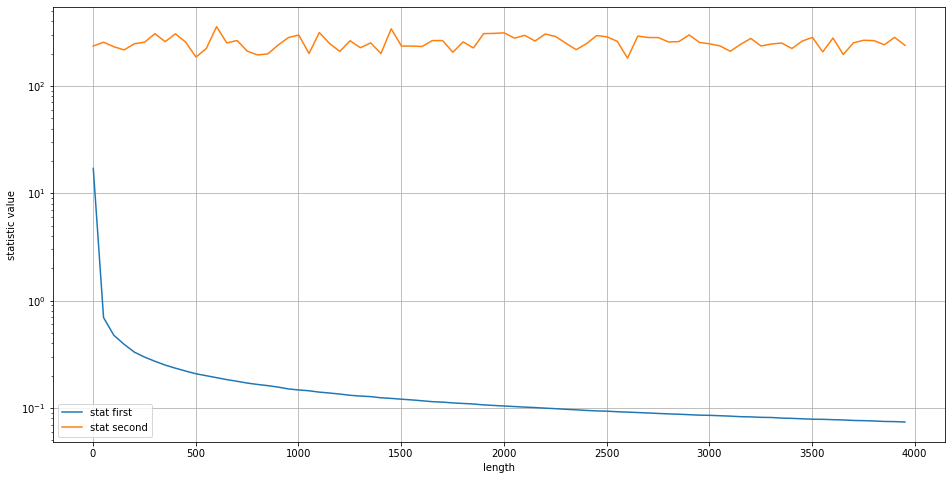

In [6]:
plt.figure(figsize=(16, 8))
plt.grid()
plt.plot(xs, interval_size_a)
plt.plot(xs, interval_size_b)
legends = ['stat first', 'stat second']
plt.legend(legends)
plt.xlabel('length')
plt.ylabel('statistic value')
plt.yscale('log')
plt.show()

Очевидно лучше использовать вариант а, потому что он адекватно убывает с увеличиением выборки, а не шатается как черт.